In [1]:
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

In [2]:
# Getting clean datasets
data_co2 = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_co2_mean.csv')
data_sea = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_ice_mean.csv')
data_temp = pd.read_csv('/Users/anna/data/climate-change/datasets/clean_temp_mean.csv')
ice_north = pd.read_csv('/Users/anna/data/climate-change/datasets/north_mean.csv')
ice_south = pd.read_csv('/Users/anna/data/climate-change/datasets/south_mean.csv')

In [3]:
# Selecting columns of interest for the correlation
ice_north = ice_north[['Year', 'Extent']]
ice_south = ice_south[['Year', 'Extent']]

# Hypothesis

H$_{0}$ = Concentration levels of carbon dioxide in the atmosphere don't affect global temperature or sea ice extent.

H$_{1}$ = Concentration levels of carbon dioxide in the atmosphere affects temperature or sea ice extent.

## Merging tables for correlation

In [4]:
# Merging CO2 and temperature
tab2 = pd.merge(data_co2[['Year', 'CO2']], data_temp, how='inner', on='Year')
tab2.head()

,Year,CO2,AvgTemp
0,1959,315.994167,15.340500
1,1960,316.905000,15.291917
2,1961,317.625000,15.379917
3,1962,318.450000,15.325583
4,1963,319.018333,15.376667


In [5]:
# Merging with global sea ice extent
tab3 = pd.merge(tab2, data_sea, how='inner', on='Year')
tab3.head()

,Year,CO2,AvgTemp,Extent
0,1979,336.888333,15.414167,12.019349
1,1980,338.655000,15.491833,11.785219
2,1981,339.943333,15.516167,11.776148
3,1982,341.082500,15.341917,12.048755
4,1983,342.735833,15.520250,11.852904


In [6]:
# Merging with Arctic
tab4 = pd.merge(tab3, ice_north, how='inner', on='Year')
tab4.rename(columns={'Extent_x':'Global_Extent', 'Extent_y':'Arctic'}, inplace=True)
tab4.head()

,Year,CO2,AvgTemp,Global_Extent,Arctic
0,1979,336.888333,15.414167,12.019349,12.319560
1,1980,338.655000,15.491833,11.785219,12.334148
2,1981,339.943333,15.516167,11.776148,12.135486
3,1982,341.082500,15.341917,12.048755,12.439445
4,1983,342.735833,15.520250,11.852904,12.335896


In [7]:
# Merging with Antarctic
data = pd.merge(tab4, ice_south, how='inner', on='Year')
data.rename(columns={'Extent':'Antarctic'}, inplace=True)
data.head()

,Year,CO2,AvgTemp,Global_Extent,Arctic,Antarctic
0,1979,336.888333,15.414167,12.019349,12.319560,11.719137
1,1980,338.655000,15.491833,11.785219,12.334148,11.236290
2,1981,339.943333,15.516167,11.776148,12.135486,11.416809
3,1982,341.082500,15.341917,12.048755,12.439445,11.658066
4,1983,342.735833,15.520250,11.852904,12.335896,11.369913


# Correlation

In [8]:
data.corr()

,Year,CO2,AvgTemp,Global_Extent,Arctic,Antarctic
Year,1.000000,0.996679,0.892661,-0.652190,-0.917875,0.520478
CO2,0.996679,1.000000,0.894555,-0.643850,-0.926874,0.544124
AvgTemp,0.892661,0.894555,1.000000,-0.604677,-0.843436,0.471498
Global_Extent,-0.652190,-0.643850,-0.604677,1.000000,0.739291,0.178199
Arctic,-0.917875,-0.926874,-0.843436,0.739291,1.000000,-0.530867
Antarctic,0.520478,0.544124,0.471498,0.178199,-0.530867,1.000000


# Regression line

### CO2 and temperature

In [9]:
co2_temp = ols("AvgTemp ~ CO2", data).fit()
co2_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgTemp   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     140.2
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           8.54e-14
Time:                        08:40:47   Log-Likelihood:                 39.335
No. Observations:                  37   AIC:                            -74.67
Df Residuals:                      35   BIC:                            -71.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3759      0.277     44.712      0.000      11.814      12.938
CO2            0.0089      0.001     11.841      0.000       0.007       0.010
==============================================================================
Omnibus:                       10.544   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                2.621
Skew:                           0.089   Prob(JB):                        0.270
Kurtosis:                       1.708   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

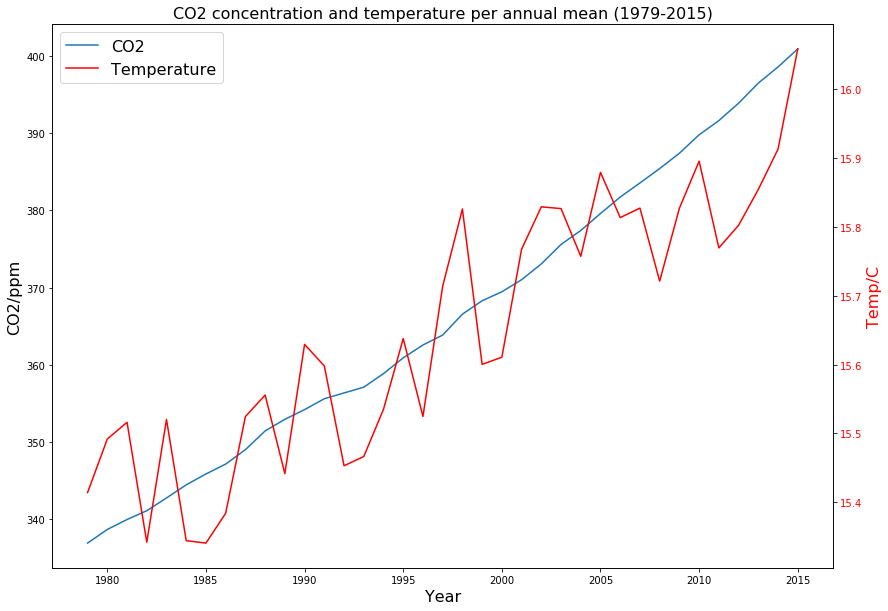

In [10]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['CO2'], label='CO2')
ax1.set_title('CO2 concentration and temperature per annual mean (1979-2015)', fontsize=16)
ax1.set_xlabel('Year', fontsize=16,)
ax1.set_ylabel('CO2/ppm', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['AvgTemp'], 'r-', label='Temperature')
ax2.set_ylabel('Temp/C', color='r', fontsize=16)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2, fontsize=16)

### CO2 and sea ice

In [11]:
co2_ice = ols("Global_Extent ~ CO2", data).fit()
co2_ice.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Global_Extent   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     24.78
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.71e-05
Time:                        08:40:47   Log-Likelihood:                 7.6055
No. Observations:                  37   AIC:                            -11.21
Df Residuals:                      35   BIC:                            -7.989
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8740      0.653     22.795      0.000      13.549      16.199
CO2           -0.0089      0.002     -4.978      0.000      -0.012      -0.005
==============================================================================
Omnibus:                        0.161   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.064
Skew:                          -0.087   Prob(JB):                        0.969
Kurtosis:                       2.896   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

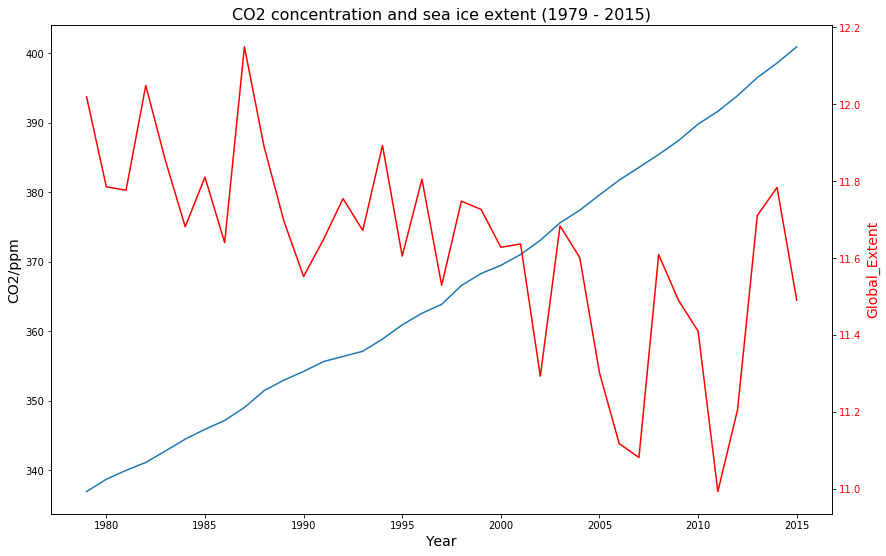

In [12]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['CO2'])
ax1.set_title('CO2 concentration and sea ice extent (1979 - 2015)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO2/ppm', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Global_Extent'], 'r-')
ax2.set_ylabel('Global_Extent', color='r', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')


### Temperature and sea ice

In [13]:
temp_ice = ols("AvgTemp ~ Global_Extent", data).fit()
temp_ice.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgTemp   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           7.37e-05
Time:                        08:40:47   Log-Likelihood:                 17.960
No. Observations:                  37   AIC:                            -31.92
Df Residuals:                      35   BIC:                            -28.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.7557      1.137     18.251      0.000      18.447      23.064
Global_Extent    -0.4391      0.098     -4.491      0.000      -0.638      -0.241
==============================================================================
Omnibus:                        1.333   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.009
Skew:                           0.401   Prob(JB):                        0.604
Kurtosis:                       2.888   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

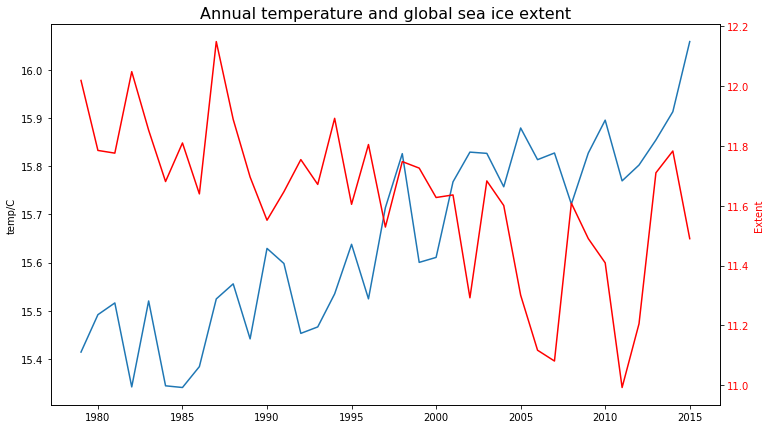

In [14]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['AvgTemp'])
ax1.set_title('Annual temperature and global sea ice extent', fontsize=16)
ax1.set_ylabel('temp/C')

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Global_Extent'], 'r-')
ax2.set_ylabel('Extent', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

## CO2 and Arctic

In [15]:
co2_arctic = ols("CO2 ~ Arctic", data).fit()
co2_arctic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     213.4
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           1.84e-16
Time:                        08:40:48   Log-Likelihood:                -124.63
No. Observations:                  37   AIC:                             253.3
Df Residuals:                      35   BIC:                             256.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    700.2343     22.896     30.583      0.000     653.753     746.716
Arctic       -29.0097      1.986    -14.608      0.000     -33.041     -24.978
==============================================================================
Omnibus:                        3.619   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.565
Skew:                          -0.629   Prob(JB):                        0.277
Kurtosis:                       3.286   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

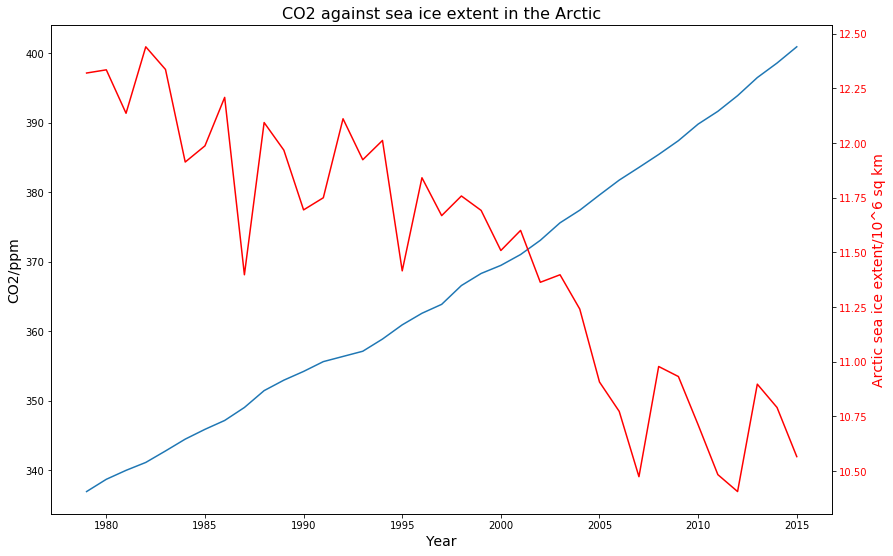

In [16]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['CO2'])
ax1.set_title('CO2 against sea ice extent in the Arctic', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO2/ppm', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Arctic'], 'r-')
ax2.set_ylabel('Arctic sea ice extent/10^6 sq km', color='r', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

## Temperature and Arctic

In [17]:
temp_arctic = ols("AvgTemp ~ Arctic", data).fit()
temp_arctic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgTemp   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     86.27
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           5.65e-11
Time:                        08:40:48   Log-Likelihood:                 32.529
No. Observations:                  37   AIC:                            -61.06
Df Residuals:                      35   BIC:                            -57.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.6858      0.327     57.074      0.000      18.021      19.350
Arctic        -0.2637      0.028     -9.288      0.000      -0.321      -0.206
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.208
Skew:                           0.071   Prob(JB):                        0.901
Kurtosis:                       2.662   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

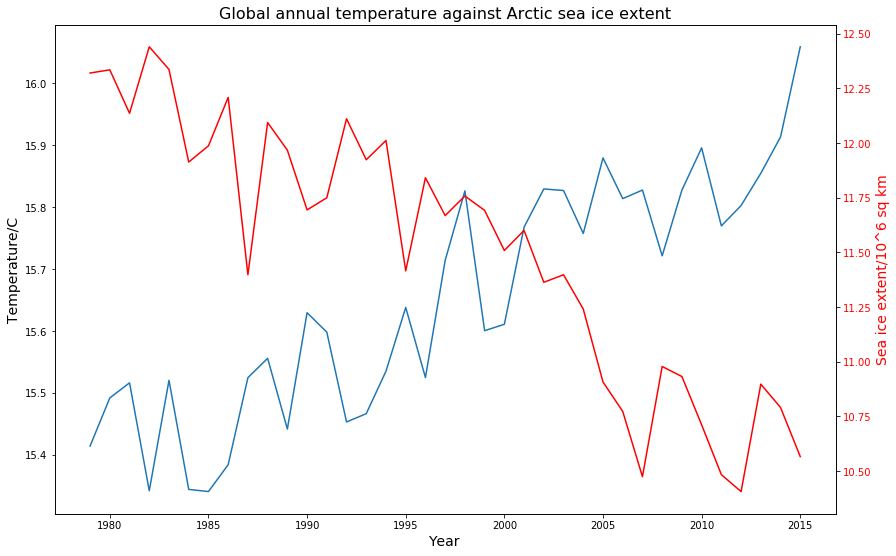

In [18]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['AvgTemp'])
ax1.set_title('Global annual temperature against Arctic sea ice extent', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Temperature/C', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Arctic'], 'r-')
ax2.set_ylabel('Sea ice extent/10^6 sq km', color='r', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

## CO2 and Antarctic

In [19]:
co2_antarctic = ols("CO2 ~ Antarctic", data).fit()
co2_antarctic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     14.72
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           0.000499
Time:                        08:40:48   Log-Likelihood:                -154.39
No. Observations:                  37   AIC:                             312.8
Df Residuals:                      35   BIC:                             316.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.9153     76.231      0.970      0.339     -80.841     228.672
Antarctic     24.8856      6.486      3.837      0.000      11.718      38.053
==============================================================================
Omnibus:                        3.061   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                1.906
Skew:                          -0.505   Prob(JB):                        0.385
Kurtosis:                       3.465   Cond. No.                         340.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

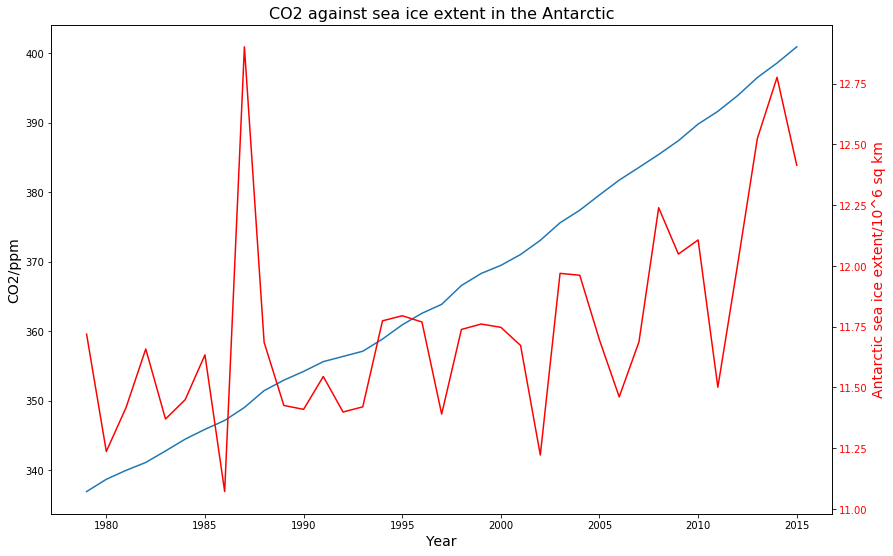

In [20]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['CO2'])
ax1.set_title('CO2 against sea ice extent in the Antarctic', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CO2/ppm', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Antarctic'], 'r-')
ax2.set_ylabel('Antarctic sea ice extent/10^6 sq km', color='r', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

## Temperature and Antarctic

In [21]:
temp_antarctic = ols("AvgTemp ~ Antarctic", data).fit()
temp_antarctic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AvgTemp   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     10.01
Date:                Thu, 04 Apr 2019   Prob (F-statistic):            0.00322
Time:                        08:40:49   Log-Likelihood:                 14.191
No. Observations:                  37   AIC:                            -24.38
Df Residuals:                      35   BIC:                            -21.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1183      0.801     16.387      0.000      11.493      14.744
Antarctic      0.2155      0.068      3.163      0.003       0.077       0.354
==============================================================================
Omnibus:                        0.956   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.933
Skew:                          -0.212   Prob(JB):                        0.627
Kurtosis:                       2.348   Cond. No.                         340.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

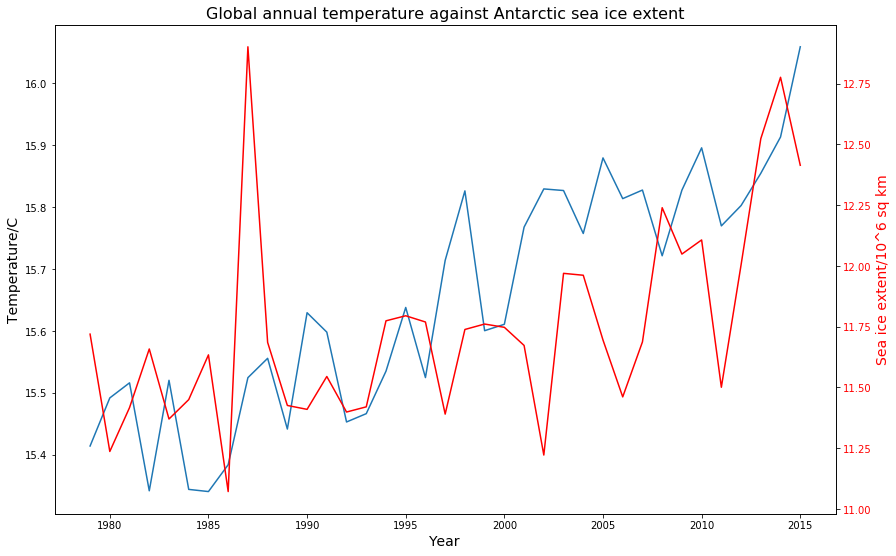

In [22]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(111)
ax1.plot(data['Year'], data['AvgTemp'])
ax1.set_title('Global annual temperature against Antarctic sea ice extent', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Temperature/C', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(data['Year'], data['Antarctic'], 'r-')
ax2.set_ylabel('Sea ice extent/10^6 sq km', color='r', fontsize=14)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Statistical test

In [23]:
# Parametric correlation (annual means)
# Person's statistical test to test the independence of CO2 and temperature.

pearson = pd.merge(data_co2, data_temp, how='inner', on='Year')
pearson.drop(columns='Month', inplace=True)
pearson.head()

,Year,CO2,AvgTemp
0,1959,315.994167,15.340500
1,1960,316.905000,15.291917
2,1961,317.625000,15.379917
3,1962,318.450000,15.325583
4,1963,319.018333,15.376667


In [24]:
from scipy.stats import pearsonr

stats.pearsonr(pearson['CO2'], pearson['AvgTemp'])

(0.9213970653230211, 3.0763045945341725e-24)

Pearson's correlation coefficient (0.92) indicates a very strong correlation between the levels of CO2 and temperature. The very small p-value indicates strong evidence against the null hypothesis, which is that the CO2 levels doesn't affect temperature.

In [25]:
# Person's statistical test to test the independence of CO2 and sea ice extent.

pearson2 = pd.merge(data_co2, data_sea, how='inner', on='Year')
pearson2.drop(columns='Month', inplace=True)
pearson2.head()
stats.pearsonr(pearson2['CO2'], pearson2['Extent'])

(-0.6848073561793777, 2.1151535135308473e-06)

Pearson's correlation coefficient is negative, meaning that when CO2 increases the global sea ice extent decreases, but the relation in this case is moderate.

In [26]:
# Pairplot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



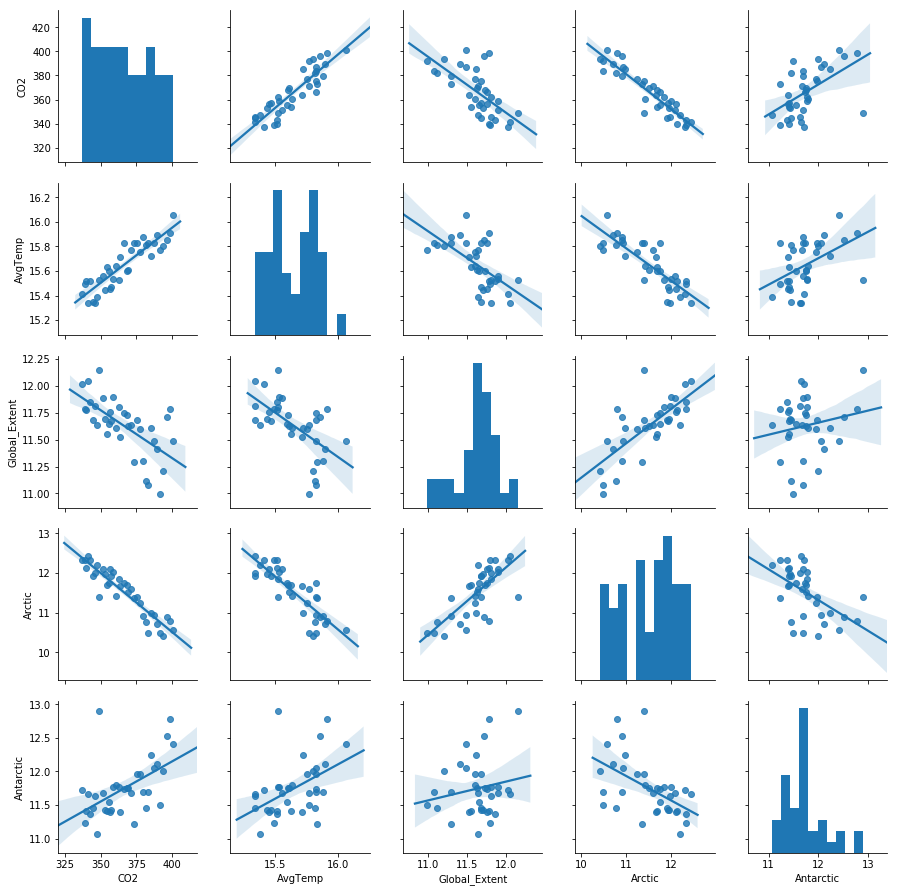

In [27]:
sns.pairplot(data, vars=['CO2', 'AvgTemp', 'Global_Extent', 'Arctic', 'Antarctic'],
                 kind='reg') 

# Results

__$CO_{2}$ and temperature:__

Corr: 0.895 / $R^{2}$: 0.795
<br>Strong positive correlation between carbon dioxide and global temperature, so when the CO2 increases the temperature follows.

__$CO_{2}$ and sea ice:__

Corr: -0.644 / $R^{2}$: 0.398
<br>Negative correlation between carbon dioxide and the extent of the global sea ice, meaning than when CO2 increases the global sea ice decreases.

__$CO_{2}$ and Arctic:__

Corr: -0.927 / $R^{2}$: 0.855
<br>Very strong negative correlation between the increase of the concentration levels of carbon dioxide and the decrease of the sea ice extent in the Arctic.

__$CO_{2}$ and Antarctic:__

Corr: -0.544 / $R^{2}$: 0.276
<br>Very weak relation between the levels of carbon dioxide and the decrease of the sea ice in the Antarctic.

__Temperature and sea ice:__

Corr: -0.605 / $R^{2}$: 0.348
<br>Weak relation between the global temperature and global sea ice extent.

__Temperature and Arctic:__

Corr: -0.843 / $R^{2}$: 0.703
<br>Strong negative correlation between increase in temperature and the decrease of extent of the Arctic.

__Temperature and Antarctic:__

Corr: 0.471 / $R^{2}$: 0.200
<br>Very weak relation between the global temperature and sea ice extent in the Antarctic.

# Conclusions

The hypothesis of the project was that the concentration levels of carbon dioxide in the atmosphere affect the temperature and the sea ice extent in the poles. 

The results show that there is a strong positive correlation between CO2 and global temperature, so when the CO2 goes up the global temperature also follows the trend.

The relation between the CO2 or temperature with the melting of the poles is not as clear as we expected. There seems to be a slight correlation between the increase of CO2 and temperature and the global decrease of the sea ice extent, but when we analyse the poles per separate, we see that there is a very strong relation between the increase of CO2 and temperature and the melting of the Arctic, but the opposite happens in the Antarctic, which is actually increasing the sea ice extent while the CO2 and temperature increases. 

We can conclude that there's a strong positive correlation between CO2 and temperature, and a very strong negative one between the CO2 and the Arctic.